# - Optimization

In this notebook we are going to display the improvements we have done to the genetic algorithm uploaded by the professor. The purpose of the task is to find out the global minimum of the Ackley function:

$f(x, y) = 20 · \exp[-0.2 · \sqrt{{1/n} · (x^2 + y^2)}] - \exp[(1/n) · (\cos 2\pi x + \cos 2\pi y)] + 20 + e$, where n = 2

To do that, there are four main evolutionary operators: selection, crossover, mutation and replacement. We have modified some of them to achieve better results which are going to be explained next.

First we are going to import some packages and define the function that we want to optimize.

In [1]:
import random
import math
from matplotlib import pyplot as plt

In [2]:
def apply_function(individual):
    x = individual["x"]
    y = individual["y"]
    firstSum = x**2.0 + y**2.0
    secondSum = math.cos(2.0*math.pi*x) + math.cos(2.0*math.pi*y) 
    n = 2
    return -(-20.0*math.exp(-0.2*math.sqrt(firstSum/n)) - math.exp(secondSum/n) + 20 + math.e)

The second step is creating a new population using a random module. Note that the function has two arguments which are two limits or boundaries. Note that the 'x' and the 'y' values of the population will never have a value over and under the defined boundaries

In [3]:
def generate_population(size, x_boundaries, y_boundaries):
    lower_x_boundary, upper_x_boundary = x_boundaries
    lower_y_boundary, upper_y_boundary = y_boundaries

    population = []
    for i in range(size):
        individual = {
            "x": random.uniform(lower_x_boundary, upper_x_boundary),
            "y": random.uniform(lower_y_boundary, upper_y_boundary),
        }
        population.append(individual)

    return population

Now we are going to define the # Selection method. It method uses probabilities to choose the best individual of the population. The better the individual was, the more probabilities to choose it has.

In [4]:
def select_by_roulette(sorted_population, fitness_sum):
    offset = 0
    normalized_fitness_sum = fitness_sum

    lowest_fitness = apply_function(sorted_population[0])
    if lowest_fitness < 0:
        offset = -lowest_fitness
        normalized_fitness_sum += offset * len(sorted_population)

    draw = random.uniform(0, 1)

    accumulated = 0
    for individual in sorted_population:
        fitness = apply_function(individual) + offset
        probability = fitness / normalized_fitness_sum
        accumulated += probability

        if draw <= accumulated:
            return individual

The crossover method is shown below.

In [5]:
# Function to calculate the fitness of each individual of the population and sort them according to this fitness value.

def sort_population_by_fitness(population):
    return sorted(population, key=apply_function)

In [6]:
# Crossing two parents to get a new children.

def crossover(individual_a, individual_b):
    xa = individual_a["x"]
    ya = individual_a["y"]

    xb = individual_b["x"]
    yb = individual_b["y"]

    return {"x": (xa + xb) / 2, "y": (ya + yb) / 2}

We do not change anything so far. The next step is mutating an individual. The structure of a random gauss distribution in Python is random.gauss(mean, std. deviation). Before modifiying it, the random gauss distribution was random.gauss(0, 0.1), which means that the standard deviation was 0.1. One of the big problems of that is that for bigger numbers the mutation was slight (for example, -4.35729 to -4.48124), but as the time the 'x' and 'y' values were decreasing, the mutation was very huge (for ex., -0.004316 to -0.127385)

How have we solved this problem? Instead of set a fixed value to the standard deviation, calculate it based on the fitness of each individual.

In [7]:
# Mutating a individual. 

def mutate(individual):
    next_x = individual["x"] + random.gauss(0, apply_function(individual)/100)#random.uniform(-0.05, 0.05)
    next_y = individual["y"] + random.gauss(0, apply_function(individual)/100)#random.uniform(-0.05, 0.05)

    lower_boundary, upper_boundary = (-4, 4)

    # Guarantee we keep inside boundaries
    next_x = min(max(next_x, lower_boundary), upper_boundary)
    next_y = min(max(next_y, lower_boundary), upper_boundary)

    return {"x": next_x, "y": next_y}

Below is shown the replacement operator and it is here where we have modified and added more things. To start, using a while loop we have checked that the parents selected by the roulette method were never be the same.

Next, we have used an elitism method to guarantee that the best individual of each generation survives until the next one. To do that, we have calculated the best individual of the generation 0 and 1, and the worst individual of the generation 1. If the best individual of the generation 0 is better than the best of the 1 one, then remove the worst individual of the generation 1 and introduce the best of the 0 one on it.

Thus, the best solution of the population will always improve over sucessive generations.

In [8]:
def make_next_generation(previous_population):
    next_generation = []
    sorted_by_fitness_population = sort_population_by_fitness(previous_population)
    population_size = len(previous_population)
    fitness_sum = sum(apply_function(individual) for individual in population)
    

    for i in range(population_size):
        father = None
        mother = None
        while(father == mother):
            father = select_by_roulette(sorted_by_fitness_population, fitness_sum)
            mother = select_by_roulette(sorted_by_fitness_population, fitness_sum)
            if (father != mother):
                break

        individual = crossover(father, mother)
        individual = mutate(individual)
        next_generation.append(individual)

# One individual elitism.

    maximoP = population[0]            
    for j in range(population_size):
        if (apply_function(population[j]) > apply_function(maximoP)):
            maximoP = population[j]
    
    maximoNG = next_generation[0]
    for k in range(len(next_generation)):
        if (apply_function(next_generation[k]) > apply_function(maximoNG)):
            maximoNG = next_generation[k]
    
    minimoNG = next_generation[0]
    for h in range(len(next_generation)):
        if (apply_function(next_generation[h]) < apply_function(minimoNG)):
            minimoNG = next_generation[h]

    if (apply_function(maximoP) > apply_function(maximoNG)):
        next_generation.remove(minimoNG)
        next_generation.append(maximoP)

    return next_generation

Now it is time to display the results. Here, we have added a 'for' loop to display 20 different solutions in a plot and compare them in order to check some problems or to claim that the algorithm works better now.

Note that most of the times the solution converges to 0, but there are other few times where the solution converges to any other number (generally -2.58). This algorithm does not provide an exact solution to the problem, just a smart way to approach solution via different iterations. There is no problem if a few times the solution converges to any other number, because the mutation and the roulette methods change over the different iterations. So, we can conclude that the solution is OK and we have been able to fix the requested problem.

1
{'x': -4.598166926819024, 'y': 4.206760451399198} -13.673349323945589
{'x': 0.8670854838415041, 'y': -2.781524657426846} -7.928968079961518
{'x': 1.5988602148957156, 'y': 0.8919850324051222} -6.29784478428903
{'x': 1.2907530724398288, 'y': 3.820427570005867} -10.319678869329675
{'x': 0.4027164233548337, 'y': -4.483988383969385} -11.733647425336017
{'x': -4.032447430452621, 'y': 2.63200462863919} -11.43192615970657
{'x': -2.3904843151460864, 'y': -0.9102061860797583} -7.752099149667298
{'x': 1.1563357281696964, 'y': -3.00290226468562} -7.854260741802733
{'x': 2.749487855953711, 'y': 3.183161695689037} -10.461196369368356
{'x': -2.7376974074454807, 'y': -0.5739405522041876} -8.637249442162013
2
{'x': 1.1787992089207744, 'y': 0.4725710987007369} -5.247683068169785
{'x': -0.5724647301529375, 'y': -1.9690552852205672} -6.710565901475032
{'x': -0.9501600884626199, 'y': -1.775394037847451} -5.932450625559287
{'x': -0.46608981140929506, 'y': -0.03274127867783197} -2.9963515957656317
{'x': -2

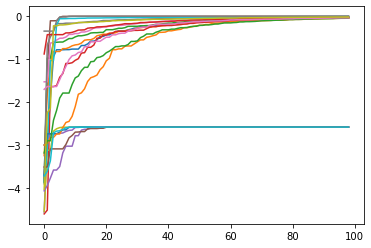

In [12]:
for nplots in range(20):
    generations = 100
    population = generate_population(size=10, x_boundaries=(-5, 5), y_boundaries=(-5, 5))
    
    i = 1
    bestFitness = []
    while True:
        
        print(str(i))
    
        for individual in population:
            print(individual, apply_function(individual))
    
        if i == generations:
            break
    
        i += 1
    
        population = make_next_generation(population)
        best_individual = sort_population_by_fitness(population)[-1]
        bestFitness.append(apply_function(best_individual))
        
    best_individual = sort_population_by_fitness(population)[-1]
    plt.plot(bestFitness)

print("\nFINAL RESULT")
print(best_individual, apply_function(best_individual))